In [11]:
# This program utilizes the Long Short Term Memory (LSTM) method to
# predict the stock chart for a particular corporation.

In [13]:
# libraries
!pip install pandas
!pip install numpy
!pip install keras
!pip install pandas_datareader
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 489.7 MB 29 kB/s             
     |████████████████████████████████| 463 kB 270 kB/s            
     |████████████████████████████████| 4.5 MB 3.5 MB/s            
     |████████████████████████████████| 5.8 MB 2.3 MB/s            
     |████████████████████████████████| 4.1 MB 1.4 MB/s            
     |████████████████████████████████| 13.3 MB 963 kB/s            
     |████████████████████████████████| 57 kB 1.2 MB/s            
     |████████████████████████████████| 81 kB 360 kB/s            
     |████████████████████████████████| 126 kB 2.0 MB/s            
     |████████████████████████████████| 42 kB 1.2 MB/s            


     |████████████████████████████████| 65 kB 1.5 MB/s            
     |████████████████████████████████| 1.1 MB 821 kB/s            
     |████████████████████████████████| 2.1 MB 2.0 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.9 MB 3.6 MB/s            
     |████████████████████████████████| 155 kB 1.4 MB/s            
     |████████████████████████████████| 781 kB 2.4 MB/s            
     |████████████████████████████████| 288 kB 1.6 MB/s            
     |████████████████████████████████| 97 kB 1.2 MB/s            
     |████████████████████████████████| 155 kB 2.2 MB/s            
     |████████████████████████████████| 77 kB 1.8 MB/s            
     |████████████████████████████████| 146 kB 2.0 MB/s            
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=3fdf6441f8e32b055986b4d32f043b06ad2cfbd402ece559a29fac7196e7dc78
  Stored in directory: /home/kawal/.cache/pip/wheels/b6/0d/

2022-01-09 22:50:29.202690: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-09 22:50:29.202710: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
# Get Stock Quote
stock_ticker = 'AAPL'
df = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2021-09-20')
# Display Data
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.591937
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.659609
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.800155
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.933965
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.913453
...,...,...,...,...,...,...
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,147.904129
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,148.812805
2021-09-16,148.970001,147.220001,148.440002,148.789993,68034100.0,148.573151


In [16]:
# Get the number of rows and columns in the data set
df.shape

(2445, 6)

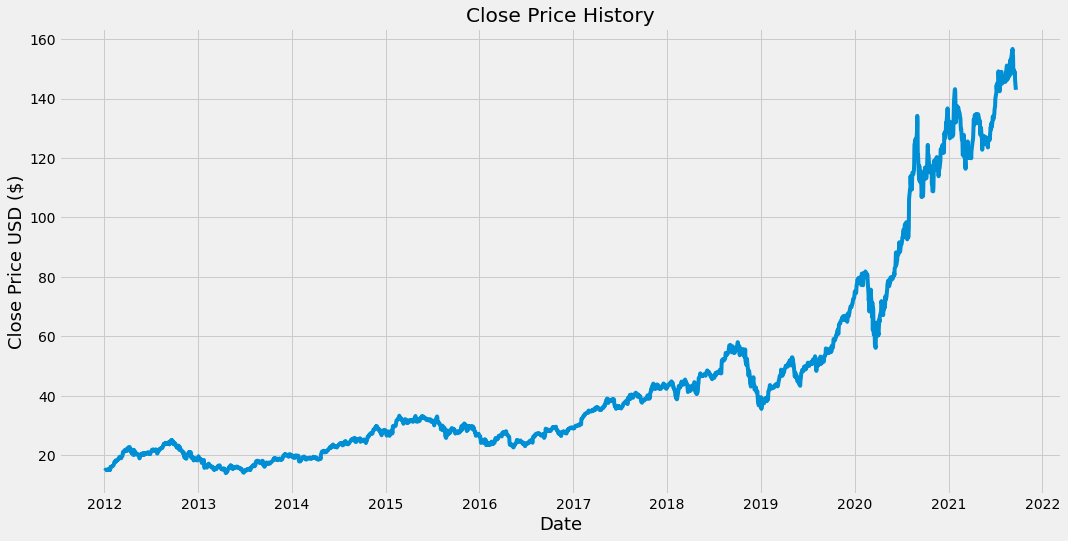

In [17]:
# Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [18]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

1956

In [19]:
# Scale the data - apply preprocessing/scaling normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00517915],
       [0.00573209],
       [0.00688052],
       ...,
       [0.94465552],
       [0.9255302 ],
       [0.9036727 ]])

In [20]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00517915, 0.00573209, 0.00688052, 0.0079739 , 0.00780626,
       0.00818406, 0.00801143, 0.00772119, 0.00732587, 0.00854936,
       0.00965275, 0.00931247, 0.00744847, 0.0092274 , 0.007476  ,
       0.01404377, 0.01353586, 0.0141989 , 0.01563254, 0.01650074,
       0.01642818, 0.01616047, 0.01730138, 0.01837474, 0.01959072,
       0.0215548 , 0.02568061, 0.02574316, 0.02804001, 0.02975638,
       0.02680652, 0.02794242, 0.02791991, 0.03110496, 0.03065209,
       0.03149026, 0.03299647, 0.03383465, 0.03624909, 0.03800799,
       0.0385159 , 0.03869355, 0.03568614, 0.03496055, 0.03506814,
       0.03789542, 0.03869105, 0.04039993, 0.04442815, 0.04980247,
       0.04879666, 0.04879916, 0.05268478, 0.05390076, 0.05303505,
       0.05224443, 0.05142127, 0.05415595, 0.05603247, 0.0568181 ])]
[0.05487653421186173]



In [21]:
# Convert the x_train and y_train to numpy arrays, so that we can train the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
# Reshape the data, so that we can change the shape from 2 dimensions to 3

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1896, 60, 1)

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

2022-01-09 22:52:49.478515: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-01-09 22:52:49.478540: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kawal-Inspiron-15-7000-Gaming): /proc/driver/nvidia/version does not exist
2022-01-09 22:52:49.479094: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [25]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1896/1896 [==============================] - 30s 15ms/step - loss: 2.3153e-04


In [27]:
# Create the testing data set 
# Create a new array containing scaled values from index 1896 to 2444

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [28]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [29]:
# Reshape the data from 2 dimensions to 3
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.750439033430291

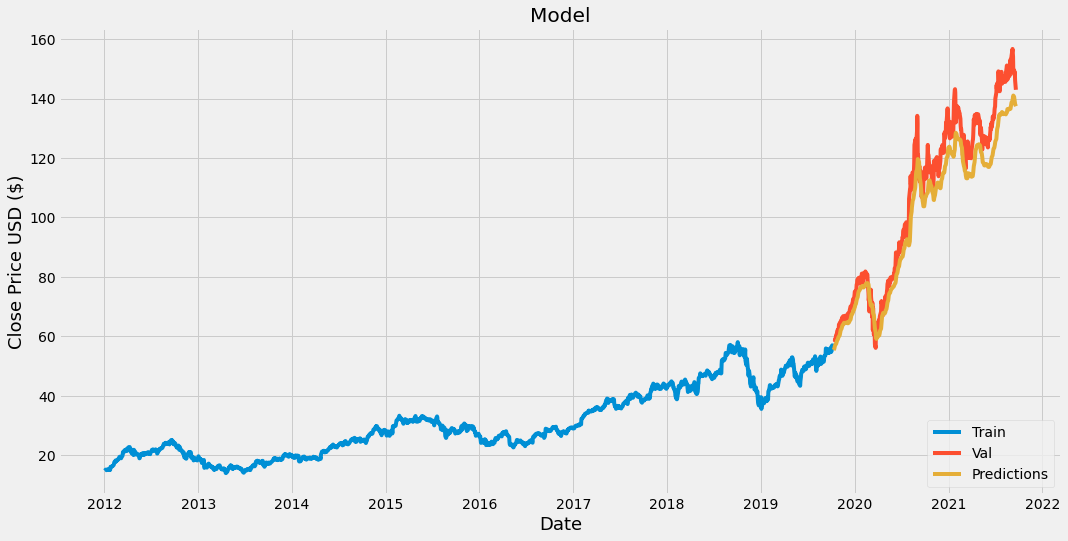

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-11,59.052502,55.375690
2019-10-14,58.967499,55.805866
2019-10-15,58.830002,56.258850
2019-10-16,58.592499,56.655731
2019-10-17,58.820000,56.953487
...,...,...
2021-09-14,148.119995,140.046753
2021-09-15,149.029999,139.298996
2021-09-16,148.789993,138.668350


In [34]:
# Get the quote
stock_quote = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2021-09-20')
# Create a new dataframe
new_df = stock_quote.filter(['Close'])
# Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[136.34914]]


In [35]:
stock_quote2 = web.DataReader(stock_ticker, data_source='yahoo', start='2021-09-20', end='2021-09-20')
print(stock_quote2['Close'])

Date
2021-09-20    142.940002
Name: Close, dtype: float64
